In [1]:
import sys
sys.path.append("..")
import torch
from fiftyone import ViewField as F
import fiftyone as fo
from cleanlab.segmentation.rank import get_label_quality_scores, issues_from_scores 
from cleanlab.segmentation.summary import display_issues

from seametrics.annotations.utils import compute_and_upload_softmin, compute_and_upload_softmin

/home/maryam/miniconda3/envs/mask2former/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATASET_NAME = "SAILING_PANOPTIC_DATASET_QA"
MODEL_PATH =  "SEA-AI/maskformer-27k-100epochs"
MODEL_NAME = "maskformer-27k-100epochs"
PRED_PROBS_FIELD = "ps_pred_probs"
SOFTMIN_MASK_FIELD = "softmin_errors"
SOFTMIN_SCORE_FIELD = "softmin_score"
TARGET_SIZE = (640, 512)

### Loading the dataset

In [3]:
dataset = fo.load_dataset(DATASET_NAME) 

In [6]:
# dataset_view = dataset.match(F("metadata.height")==640).take(10)
dataset_view = dataset.select_group_slices().match(F("filepath").ends_with(["12971689_r.jpg", "1289311_r.jpg", "23562072_r.jpg"])) #change this to be smaller than the entire dataset if you want to do a quick test

### Compute the average softmin score over a dataset

In [8]:
avg_softmin_score, pred_probs_all_np, ground_truth_labels_all_np = compute_and_upload_softmin(dataset_view, MODEL_PATH, TARGET_SIZE, PRED_PROBS_FIELD, SOFTMIN_MASK_FIELD, SOFTMIN_SCORE_FIELD)

/home/maryam/miniconda3/envs/mask2former/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Backbone maskformer-swin is not a supported model and may not be compatible with MaskFormer. Supported model types: resnet,swin
100%|██████████| 2/2 [00:01<00:00,  1.02it/s]


In [9]:
avg_softmin_score

0.0188

### Visualize the outputs of softmin

images processed using softmin: 100%|██████████| 2/2 [00:00<00:00, 229.52it/s]

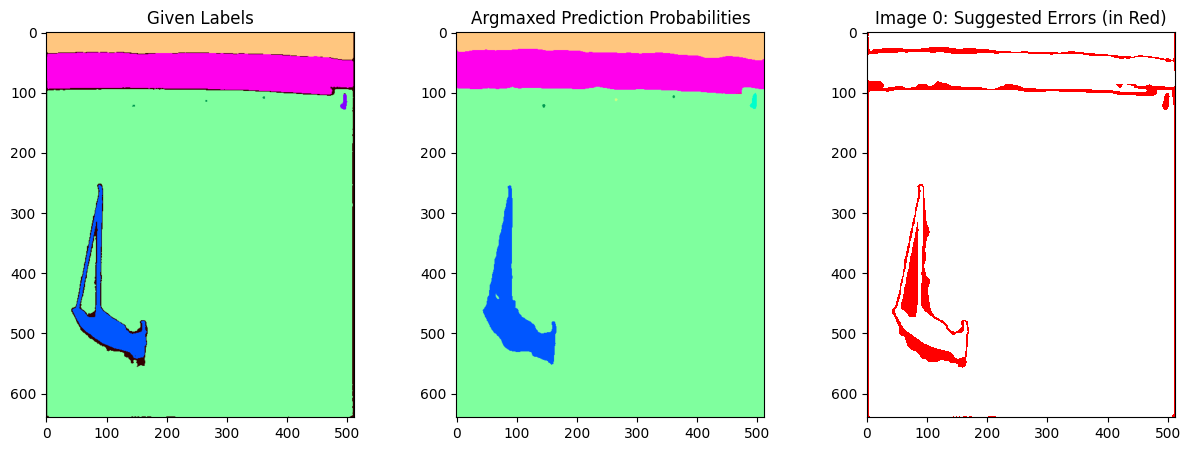

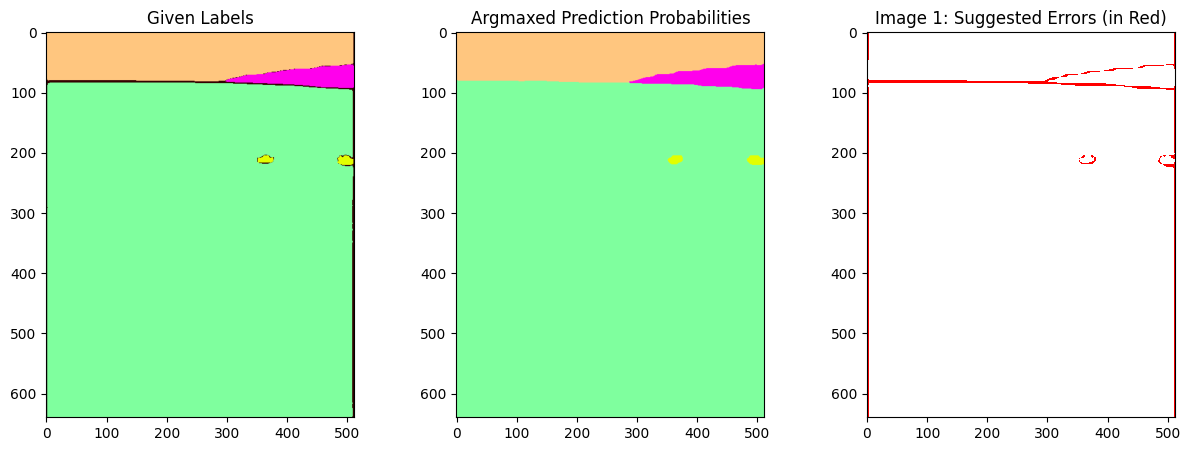

In [10]:
# issues = find_label_issues(ground_truth_labels_all_np, pred_probs_all_np, downsample = 4, n_jobs=None, batch_size=1)
image_scores, pixel_scores = get_label_quality_scores(labels=ground_truth_labels_all_np, pred_probs=pred_probs_all_np)
issues_from_score = issues_from_scores(image_scores, pixel_scores, threshold=0.5)

display_issues(issues_from_score, labels=ground_truth_labels_all_np, pred_probs=pred_probs_all_np, top=5)